In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import itertools
from datetime import datetime, timedelta, date
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from arch.unitroot import engle_granger
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
from bs4 import BeautifulSoup
import requests, requests_html
warnings.simplefilter('ignore')
from numpy import log, polyfit, sqrt, std, subtract
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pykalman import KalmanFilter
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import itertools
from datetime import datetime, timedelta, date
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from arch.unitroot import engle_granger
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
from bs4 import BeautifulSoup
import requests, requests_html
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import itertools
from datetime import datetime, timedelta, date
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from arch.unitroot import engle_granger
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
from bs4 import BeautifulSoup
import requests, requests_html
warnings.simplefilter('ignore')

In [4]:
import numpy as np
import pandas as pd

In [5]:
cs = pd.read_excel('taiwan tickers.xlsx')

In [6]:
import yfinance as yf
symbList = cs['Tickers'].values.tolist()
df = yf.download(symbList,'2016-9-1','2020-9-1')['Adj Close']
print(df.head())

[*********************100%***********************]  169 of 169 completed

3 Failed downloads:
- 4751.TA: No data found, symbol may be delisted
- 9104.TA: No data found, symbol may be delisted
- 6753.TA: No data found, symbol may be delisted
                 2413.T       2914.T      3038.T      3436.T       4063.T  \
Date                                                                        
2016-09-01  1520.203369  3050.442139  245.937439  830.300476  6906.626953   
2016-09-02  1493.144653  3105.657227  239.421066  809.429382  6861.225098   
2016-09-05  1472.973877  3101.119385  240.432205  786.743652  6829.721680   
2016-09-06  1510.363892  3106.413574  240.095154  772.224792  6852.886230   
2016-09-07  1574.320679  3059.518311  240.207535  747.724121  6950.175293   

                4188.T       4202.T       4204.T      4321.T  4385.T  ...  \
Date                                                                  ...   
2016-09-01  548.083374  1156.087402  1340.230103  434.519989     

In [7]:
df = df.dropna(axis=1, how='all')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 997 entries, 2016-09-01 to 2020-09-01
Columns: 166 entries, 2413.T to 9984.T
dtypes: float64(166)
memory usage: 1.3 MB


In [9]:
df.head()

,2413.T,2914.T,3038.T,3436.T,4063.T,4188.T,4202.T,4204.T,4321.T,4385.T,...,9502.T,9503.T,9506.T,9508.T,9603.T,9613.T,9735.T,9831.T,9983.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-01,1520.203369,3050.442139,245.937439,830.300476,6906.626953,548.083374,1156.087402,1340.230103,434.519989,NaN,...,1233.782471,779.069824,1148.870728,884.940979,2509.066406,948.828308,7837.448242,438.988495,34652.343750,3325.285400
2016-09-02,1493.144653,3105.657227,239.421066,809.429382,6861.225098,549.442566,1138.246704,1350.225342,434.519989,NaN,...,1259.938843,803.928162,1163.131348,893.952637,2463.772705,957.695923,7832.490723,441.737885,34420.937500,3326.253906
2016-09-05,1472.973877,3101.119385,240.432205,786.743652,6829.721680,549.187805,1127.542114,1336.595703,431.809845,NaN,...,1279.001831,817.185974,1182.739624,902.964233,2443.013428,957.695923,7779.936523,446.320251,35790.058594,3359.666260
2016-09-06,1510.363892,3106.413574,240.095154,772.224792,6852.886230,550.122192,1140.030762,1357.494263,435.423370,NaN,...,1277.228638,812.824829,1181.848145,911.975830,2499.630127,955.922302,7837.448242,453.652008,35539.382812,3340.296387
2016-09-07,1574.320679,3059.518311,240.207535,747.724121,6950.175293,541.032776,1115.053345,1369.306641,430.003174,NaN,...,1314.911621,835.240967,1209.478149,925.493347,2584.555664,950.601807,7779.936523,456.401398,35086.218750,3333.517334


In [10]:
df = df[1:]

In [11]:
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer,axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 996 entries, 2016-09-02 to 2020-09-01
Columns: 165 entries, 2413.T to 9984.T
dtypes: float64(165)
memory usage: 1.3 MB


In [13]:
df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(method='ffill')

In [14]:
# SPLITS DATA INTO TRANING and TESTING SAMPLE
split_train = .7
train_sample = int(split_train * len(df))

In [15]:
# creates combinations of all tickers within the selected index
symbol_pairs = list(itertools.combinations(symbList, 2))
significance_level = 0.05

# selects pairs based on Engle-Granger cointegration test 
def find_cointegrated_pairs(dataframe):
    coint_pairs = []
    for y, x in symbol_pairs:
            try:
                eg_test = engle_granger(dataframe[y], dataframe[x], trend="n")
                print(f'{y} - {x} : p-value = {eg_test.pvalue}')
                if eg_test.pvalue < significance_level:
                    coint_pairs.append((y, x, eg_test.pvalue))
            except:
                print(f'Oops! Nans detected. The pair: {x} - {y} will be skipped.')
    return coint_pairs

find_cointegrated_pairs(df[0:train_sample])

2413.T - 2914.T : p-value = 0.7332531660063676
2413.T - 3038.T : p-value = 0.7864930770824003
2413.T - 3436.T : p-value = 0.5649413468618725
2413.T - 4063.T : p-value = 0.33954783424366075
2413.T - 4188.T : p-value = 0.5288155615485101
2413.T - 4202.T : p-value = 0.5740525858001444
2413.T - 4204.T : p-value = 0.6382164268060371
2413.T - 4321.T : p-value = 0.13373092159556643
Oops! Nans detected. The pair: 4385.T - 2413.T will be skipped.
2413.T - 4452.T : p-value = 0.11810945798844352
2413.T - 4502.T : p-value = 0.7776054683670282
2413.T - 4503.T : p-value = 0.20937157823925207
2413.T - 4507.T : p-value = 0.4619100032783497
2413.T - 4519.T : p-value = 0.43330939979251226
2413.T - 4523.T : p-value = 0.38452828132096484
2413.T - 4543.T : p-value = 0.23387262049722113
2413.T - 4563.T : p-value = 0.24400052569387903
2413.T - 4565.T : p-value = 0.6267973357101272
2413.T - 4568.T : p-value = 0.8769024751120795
2413.T - 4578.T : p-value = 0.6814213314541347
2413.T - 4661.T : p-value = 0.38343

[('2413.T', '6594.T', 0.04654787056329553),
 ('2413.T', '6762.T', 0.013590685935725514),
 ('2413.T', '6967.T', 0.04756129159052526),
 ('2914.T', '4204.T', 0.031623045227279774),
 ('2914.T', '5201.T', 0.030183807951410145),
 ('2914.T', '5406.T', 0.028584924269616254),
 ('2914.T', '6472.T', 0.03919828655035528),
 ('2914.T', '6724.T', 0.023770350521185177),
 ('2914.T', '6770.T', 0.020881279253763065),
 ('2914.T', '7261.T', 0.04185142896253588),
 ('2914.T', '8253.T', 0.0435114681440581),
 ('2914.T', '9104.T', 0.01642756763389169),
 ('4063.T', '4321.T', 0.03502609359571555),
 ('4063.T', '5108.T', 0.039500544087053883),
 ('4063.T', '6326.T', 0.024961352321774776),
 ('4063.T', '6501.T', 0.026849776627276896),
 ('4063.T', '6503.T', 0.038763910643970986),
 ('4063.T', '6902.T', 0.03362907277032306),
 ('4063.T', '6925.T', 0.021397532898278004),
 ('4063.T', '6954.T', 0.043182614013249375),
 ('4063.T', '7186.T', 0.027833969629187244),
 ('4063.T', '7202.T', 0.039612928860531006),
 ('4063.T', '7267.T

In [16]:
# displays the selected pairs
coint_pairs = find_cointegrated_pairs(df[0:train_sample])
print(f'All the selected pairs with p-value lower or equal: {significance_level} are: ')
for c, pair in enumerate(coint_pairs, 1):
    print(f'Pair : {pair[0]} - {pair[1]}, pvalue: {pair[2]}')

2413.T - 2914.T : p-value = 0.7332531660063676
2413.T - 3038.T : p-value = 0.7864930770824003
2413.T - 3436.T : p-value = 0.5649413468618725
2413.T - 4063.T : p-value = 0.33954783424366075
2413.T - 4188.T : p-value = 0.5288155615485101
2413.T - 4202.T : p-value = 0.5740525858001444
2413.T - 4204.T : p-value = 0.6382164268060371
2413.T - 4321.T : p-value = 0.13373092159556643
Oops! Nans detected. The pair: 4385.T - 2413.T will be skipped.
2413.T - 4452.T : p-value = 0.11810945798844352
2413.T - 4502.T : p-value = 0.7776054683670282
2413.T - 4503.T : p-value = 0.20937157823925207
2413.T - 4507.T : p-value = 0.4619100032783497
2413.T - 4519.T : p-value = 0.43330939979251226
2413.T - 4523.T : p-value = 0.38452828132096484
2413.T - 4543.T : p-value = 0.23387262049722113
2413.T - 4563.T : p-value = 0.24400052569387903
2413.T - 4565.T : p-value = 0.6267973357101272
2413.T - 4568.T : p-value = 0.8769024751120795
2413.T - 4578.T : p-value = 0.6814213314541347
2413.T - 4661.T : p-value = 0.38343

In [17]:
pvalue_list_sorted = coint_pairs
pvalue_list_sorted = sorted(coint_pairs, key=lambda x: abs(x[2]),reverse = False) 
top_pairs = 1000
top_coint_pairs_list = []

for c, pair in enumerate(pvalue_list_sorted, 1):
    if len(top_coint_pairs_list) < top_pairs:
        
        
        
        top_coint_pairs_list.append((pair[0], pair[1], pair[2]))
        print(f'{c}: |{pair[0]: <4}| - |{pair[1]: <4}| p-value: {round(pair[2],3)}')
    else:
        break

1: |8316.T| - |8591.T| p-value: 0.0
2: |5401.T| - |9104.T| p-value: 0.0
3: |8355.T| - |8591.T| p-value: 0.0
4: |8334.T| - |8515.T| p-value: 0.0
5: |5406.T| - |8515.T| p-value: 0.0
6: |7762.T| - |8515.T| p-value: 0.0
7: |8233.T| - |8515.T| p-value: 0.0
8: |7762.T| - |8334.T| p-value: 0.0
9: |6925.T| - |9432.T| p-value: 0.0
10: |8766.T| - |9005.T| p-value: 0.001
11: |7182.T| - |7201.T| p-value: 0.001
12: |7186.T| - |9101.T| p-value: 0.001
13: |5406.T| - |8334.T| p-value: 0.001
14: |8308.T| - |8750.T| p-value: 0.001
15: |7741.T| - |7832.T| p-value: 0.001
16: |7186.T| - |8795.T| p-value: 0.001
17: |5201.T| - |5802.T| p-value: 0.001
18: |9020.T| - |9432.T| p-value: 0.001
19: |4202.T| - |7201.T| p-value: 0.001
20: |6971.T| - |9432.T| p-value: 0.001
21: |8316.T| - |8593.T| p-value: 0.002
22: |5713.T| - |6301.T| p-value: 0.002
23: |5406.T| - |7762.T| p-value: 0.002
24: |4321.T| - |7269.T| p-value: 0.002
25: |4202.T| - |5802.T| p-value: 0.002
26: |6301.T| - |6902.T| p-value: 0.002
27: |4704.T| 

In [18]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
 
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
 
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
 
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

###############################################################################
##### ADF TEST
###############################################################################
def adf_test(x, y):
    df = pd.DataFrame({'y':y,'x':x})
    est = sm.OLS(df.y, df.x)
    est = est.fit()
    df['hr'] = -est.params[0]
    df['spread'] = df.y + (df.x * df.hr)
    
    cadf = ts.adfuller(df.spread)   
    return cadf[1] 

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    
    spread_lag2 = sm.add_constant(spread_lag)
     
    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))
 
    if halflife <= 0:
        halflife = 1
    return halflife
    
def KalmanFilterAverage(x):
    # Construct a Kalman filter
    from pykalman import KalmanFilter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = 0,
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
# Use the observed values of the price to get a rolling mean
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means
## Kalman filter regression
def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)
    
    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                      initial_state_mean=[0,0],
                      initial_state_covariance=np.ones((2, 2)),
                      transition_matrices=np.eye(2),
                      observation_matrices=obs_mat,
                      observation_covariance=2,
                      transition_covariance=trans_cov)
    
    # Use the observations y to get running estimates and errors for the state parameters
    state_means, state_covs = kf.filter(y.values)
    return state_means    


In [19]:
def backtest(df,sym1,sym2,strategy,spread_calculation,entryZscore,exitZscore,stoploss_Zscore):

    
    
#     """BACKTESTING SELECTED PAIR.....

#     Parameters
#     ----------
#     dataframe : pandas dataframe
#         All assets close prices
#     sym1 : string
#         The symbol of asset one
#     sym2 : string
#         The symbol of asset two
#     strategy : int
#         Trading strategy selection {1,2}.
#     roll_beta_window : integer 
#     zscore_window : integer
#     entryZscore : float
#     exitZscore : float

#     Returns
#     -------
#     dataframe[f'Cum_rets: {sym1} {sym2}'], CAGR, sharpe, num_days_in_market : pd.series
#         Time series of cumulative returns for selected pair
#     comp_ann_return_net, annualised_sharpe_net , num_days_in_the_market : float
#         Compound annual growth rate (CAGR) for selected pair
#    annualised_sharpe_net , num_days_in_the_market : float
#         Sharpe Ratio for selected pair
#    num_days_in_the_market : integer
#         Number of days the pair is 'in the market'

#     """
    
    y = df[sym1]
    x = df[sym2]
    intersect = y.index.intersection(x.index)
    y = y.loc[intersect]
    x = x.loc[intersect]

    # creates a dataframe using Adj. Close prices from both series
    dataframe = pd.DataFrame(index=y.index).dropna()
    
    dataframe['%s_close' % sym1.lower()] = y
    dataframe['%s_close' % sym2.lower()] = x  
    if spread_calculation == 1:
        state_means = KalmanFilterRegression(KalmanFilterAverage(x),KalmanFilterAverage(y))
        dataframe['hr'] = - state_means[:,0]
        dataframe['spread'] = y + (x * dataframe.hr)
        halflife = half_life(dataframe['spread'])
    if spread_calculation == 2:
        est = sm.OLS(y,x)
        est = est.fit()
        dataframe['hr'] = -est.params[0]

        dataframe['spread'] = y + (x * dataframe.hr)
        halflife = half_life(dataframe['spread'])
    

    ##############################################################
    

    ##########################################################

    meanSpread = dataframe.spread.rolling(window=halflife).mean()
    stdSpread = dataframe.spread.rolling(window=halflife).std()
    
        
    dataframe['zScore'] = (dataframe.spread-meanSpread)/stdSpread
   

    # selects a trading model : 1 or 2
    #     :1 (standard model): buy/sell when z-score reach an entry threshold, 
    #        and exit when z-score reaches exit threshold.
    #     :2 (alternative model): buy/sell when z-score reach an entry threshold, 
    #        and the current z-score level is lower/higher that the previous one.

    if strategy == 1:
    # code below (only for model == 1) borrowed from (https://www.pythonforfinance.net/)
        dataframe['long_entry'] = ((dataframe.zScore < - entryZscore) & ( dataframe.zScore.shift(1) > - entryZscore)) 
        dataframe['long_exit'] = ((dataframe.zScore > - exitZscore) & (dataframe.zScore.shift(1) < - exitZscore)) 
        dataframe['stop_loss_exit_long'] = ((dataframe.zScore < - stoploss_Zscore) & ( dataframe.zScore.shift(1) > - stoploss_Zscore))
        dataframe.loc[dataframe['long_entry'],'pos_long'] = 1 
        dataframe.loc[dataframe['long_exit'],'pos_long'] = 0 
        dataframe.loc[dataframe['stop_loss_exit_long'],'pos_long'] = 0
        dataframe['pos_long'][0] = 0 
        dataframe['pos_long'] = dataframe['pos_long'].fillna(method='pad') 

        #calculate when portfolio is SHORT
        dataframe['short_entry'] = ((dataframe.zScore > entryZscore) & ( dataframe.zScore.shift(1) < entryZscore))
        dataframe['short_exit'] = ((dataframe.zScore < exitZscore) & (dataframe.zScore.shift(1) > exitZscore))
        dataframe['stop_loss_exit_short'] = ((dataframe.zScore <  stoploss_Zscore) & ( dataframe.zScore.shift(1) >  stoploss_Zscore))
        dataframe.loc[dataframe['short_entry'],'pos_short'] = -1
        dataframe.loc[dataframe['short_exit'],'pos_short'] = 0
        dataframe.loc[dataframe['stop_loss_exit_short'],'pos_short'] = 0
        dataframe['pos_short'][0] = 0
        dataframe['pos_short'] = dataframe['pos_short'].fillna(method='pad')
    
    if strategy == 2:
        dataframe['long_entry'] = ((dataframe.zScore < -entryZscore) & ( dataframe.zScore < dataframe.zScore.shift(1))) 
        dataframe.loc[dataframe['long_entry'],'pos_long'] = 1 
        dataframe['pos_long'] = dataframe['pos_long'].fillna(0) 
        dataframe['long_exit'] = ((dataframe['pos_long'] == 0) & ( dataframe['pos_long'].shift(1) == 1))
        dataframe['short_entry'] = ((dataframe.zScore > entryZscore) & ( dataframe.zScore > dataframe.zScore.shift(1)))
        dataframe.loc[dataframe['short_entry'],'pos_short'] = -1
        dataframe['pos_short'] = dataframe['pos_short'].fillna(0)
        dataframe['short_exit'] = ((dataframe['pos_short'] == 0) & ( dataframe['pos_short'].shift(1) == -1)) 
        
    # combine longs/shorts and remove Look ahead bias by lagging the signal
    dataframe['position'] = dataframe['pos_long'].shift(1) + dataframe['pos_short'].shift(1)

    #########################################
    # Override entry/exit columns with entry/exit data 
    dataframe['long_entry'] = ((dataframe.pos_long.shift(1) == 1) & ((dataframe.position - dataframe.position.shift(1)) == 1)) * 1
    dataframe['long_exit'] = ((dataframe.long_exit == True) & (dataframe.position == 1)) * 1
    dataframe['stop_loss_long_exit'] = ((dataframe.stop_loss_exit_long == True) & (dataframe.position == 1)) * 1
    dataframe['short_entry'] = ((dataframe.pos_short.shift(1) == -1)  & ((dataframe.position - dataframe.position.shift(1)) == -1)) * 1
    dataframe['short_exit'] = ((dataframe.short_exit == True) & (dataframe.position == -1)) * 1
    dataframe['stop_loss_short_exit'] = ((dataframe.stop_loss_exit_short == True) & (dataframe.position == -1)) * 1
    

    # calculates adjusted spread using using current prices and hedge ratio from previous bar (avoiding look-ahead bias)
    dataframe['test_spread_adj'] = dataframe.iloc[:, 0] + (dataframe['hr'].shift(1) * dataframe.iloc[:, 1])
    
    dataframe['pct_ret'] = ((dataframe['test_spread_adj'] - dataframe['spread'].shift(1)) / 
                        (dataframe.iloc[:, 0].shift(1) + (abs(dataframe['hr'].shift(1)) * dataframe.iloc[:, 1].shift(1))))

    # calculates actual return for a day according to your position
    dataframe['port_ret'] = dataframe['position'] * dataframe['pct_ret'] 
    dataframe['port_ret'].fillna(0.0, inplace=True)

    # trading fees (set here as 0.025%:  slippage + transaction fees, for example you pay 0.25 USD per 1,000 value of trade)
    tr_costs = 0.00025
    dataframe['tr_cost_paid'] = (dataframe.long_entry | dataframe.long_exit | dataframe.short_entry | dataframe.short_exit | dataframe.stop_loss_exit_short | dataframe.stop_loss_exit_long)
    dataframe['port_ret_net'] = dataframe['port_ret'] - ( tr_costs * dataframe['tr_cost_paid'])

    # cumulative portfolio return gross and net
    dataframe['cum_port_ret_net'] = (dataframe['port_ret_net'] + 1.0).cumprod()
    
    # calculates Sharpe Ratio
    try:
        annualised_sharpe_net = np.sqrt(252) * dataframe['port_ret_net'].mean() / dataframe['port_ret_net'].std()
    except ZeroDivisionError:
        annualised_sharpe_net = 0.0
    # calculates CAGR   
    end = dataframe.cum_port_ret_net.iloc[-1]
    start = dataframe.cum_port_ret_net.iloc[0]
    days = len(dataframe.cum_port_ret_net)
    comp_ann_return_net = ((end / start) ** (252/days))  - 1.0  
    
    # calculates number of days the pair is 'in the market'
    num_days_in_the_market = len(dataframe.query("position == 1 or position  == -1")['port_ret'])
    
    # calculate sum of long and short entries
    num_trades_long = dataframe.query('long_entry == True')['long_entry'].sum()
    num_trades_short = dataframe.query('short_entry == True')['short_entry'].sum()
    stoploss_long = dataframe.query('stop_loss_long_exit == True')['stop_loss_long_exit'].sum()
    stoploss_short = dataframe.query('stop_loss_short_exit == True')['stop_loss_short_exit'].sum()
    
    # calculates total trading costs paid
    approx_tr_costs = (num_trades_long + num_trades_short) * tr_costs
    #pd.set_option('display.max_rows', 500)
    
    dataframe[f'Cum_rets: {sym1} {sym2}'] = dataframe['cum_port_ret_net']
    dataframe[f'Zscore: {sym1} {sym2}'] = dataframe['zScore']
    
    return dataframe[f'Cum_rets: {sym1} {sym2}'], comp_ann_return_net, annualised_sharpe_net , num_days_in_the_market

In [ ]:
## Rolling OLS
7186.T-8795.T
6326.T-6925.T
6981.T-9433.T
8058.T-8252.T
5406.T-9104.T
4188.T-6902.T
4204.T-6503.T
6326.T-9831.T
5406.T-6472.T
4202.T-4578.T
7270.T-9104.T
5406.T-6925.T


Bactest for period: 2019-06-11 00:00:00 - 2020-09-01 00:00:00
Net performance statistics (after transaction costs) for total number of pairs: 691
 The pair 5406.T-8515.T-> CAGR: 0.15542154203912428, Sharpe: 1.0476574543720607, Number of days in trade: 94
 The pair 7741.T-7832.T-> CAGR: 0.25709556854175664, Sharpe: 1.8210133713908225, Number of days in trade: 151
 The pair 7186.T-8795.T-> CAGR: 0.15251118186313484, Sharpe: 1.580161825701189, Number of days in trade: 122
 The pair 5713.T-6301.T-> CAGR: 0.29213061493087555, Sharpe: 2.7696357465500148, Number of days in trade: 108
 The pair 4321.T-8035.T-> CAGR: 0.17944678876836861, Sharpe: 1.067129422029892, Number of days in trade: 124
 The pair 6925.T-8591.T-> CAGR: 0.20048199795052546, Sharpe: 1.7576145401643684, Number of days in trade: 112
 The pair 6954.T-7186.T-> CAGR: 0.20122308809224365, Sharpe: 1.6442606532419384, Number of days in trade: 123
 The pair 6326.T-6925.T-> CAGR: 0.17600068419194237, Sharpe: 1.5616943111715142, Number

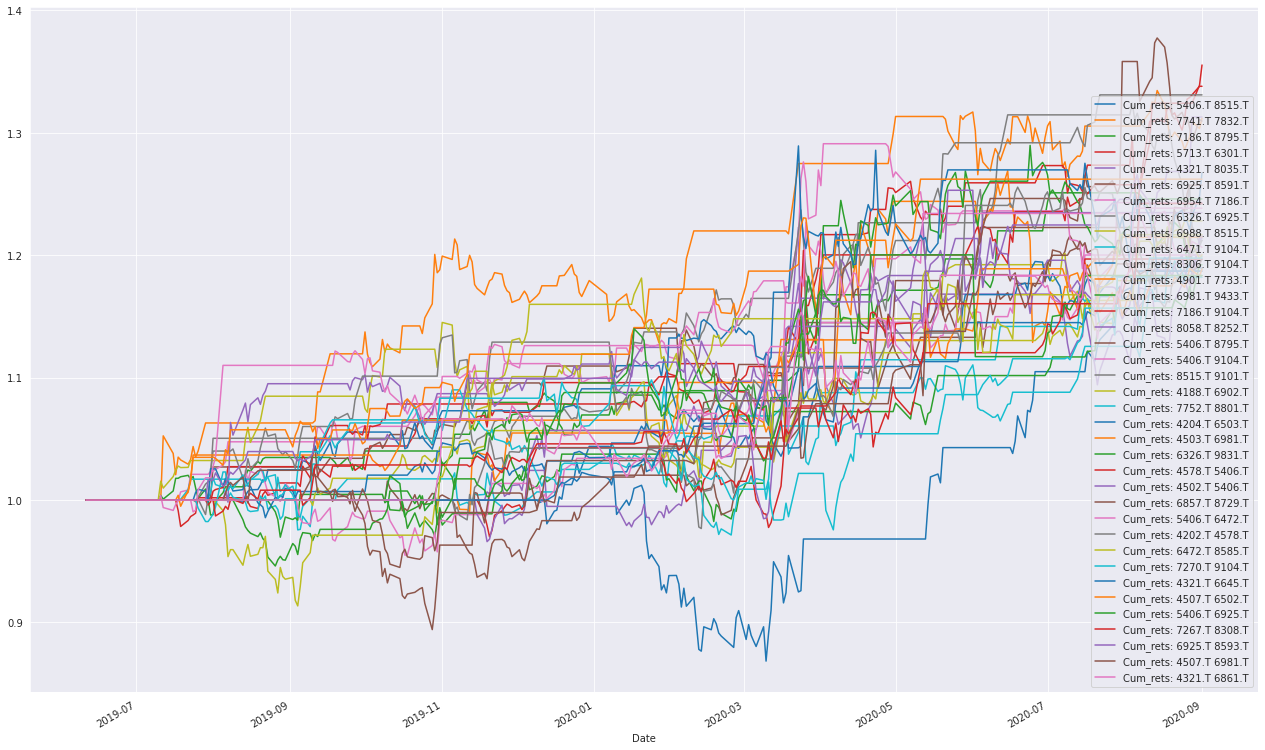

In [20]:
# PERFORMS BACKTEST for the whole portfolio of pairs
threshold1 = 0.15
threshold2 = 1
all_cum_returns = []
print(f'Bactest for period: {df[train_sample:].index[0]} - {df[train_sample:].index[-1]}')
print(f'Net performance statistics (after transaction costs) for total number of pairs: {len(top_coint_pairs_list)}' )

for pair in top_coint_pairs_list:
    cum_returns, CAGR, sharpe, num_days_in_market = backtest(df[train_sample:], pair[0],pair[1], strategy = 1, spread_calculation = 2, entryZscore = 2.0, exitZscore = 0,stoploss_Zscore = 4)
    if CAGR > threshold1:
        if sharpe > threshold2:
            all_cum_returns.append(cum_returns)
            print(f' The pair {pair[0]}-{pair[1]}-> CAGR: {CAGR}, Sharpe: {sharpe}, Number of days in trade: {num_days_in_market}')
    
    #prints equity curve of each pair (for too many pairs the legend does not fit to the image)
            cum_returns.plot(figsize=(22,14),legend=True)
            
                    

Bactest for period: 2019-06-11 00:00:00 - 2020-09-01 00:00:00
Net performance statistics (after transaction costs) for total number of pairs: 691
 The pair 5406.T-8515.T-> CAGR: 0.15542154203912428, Sharpe: 1.0476574543720607, Number of days in trade: 94
 The pair 7741.T-7832.T-> CAGR: 0.25709556854175664, Sharpe: 1.8210133713908225, Number of days in trade: 151
 The pair 7186.T-8795.T-> CAGR: 0.15251118186313484, Sharpe: 1.580161825701189, Number of days in trade: 122
 The pair 5713.T-6301.T-> CAGR: 0.29213061493087555, Sharpe: 2.7696357465500148, Number of days in trade: 108
 The pair 4321.T-8035.T-> CAGR: 0.17944678876836861, Sharpe: 1.067129422029892, Number of days in trade: 124
 The pair 6925.T-8591.T-> CAGR: 0.20048199795052546, Sharpe: 1.7576145401643684, Number of days in trade: 112
 The pair 6954.T-7186.T-> CAGR: 0.20122308809224365, Sharpe: 1.6442606532419384, Number of days in trade: 123
 The pair 6326.T-6925.T-> CAGR: 0.17600068419194237, Sharpe: 1.5616943111715142, Number

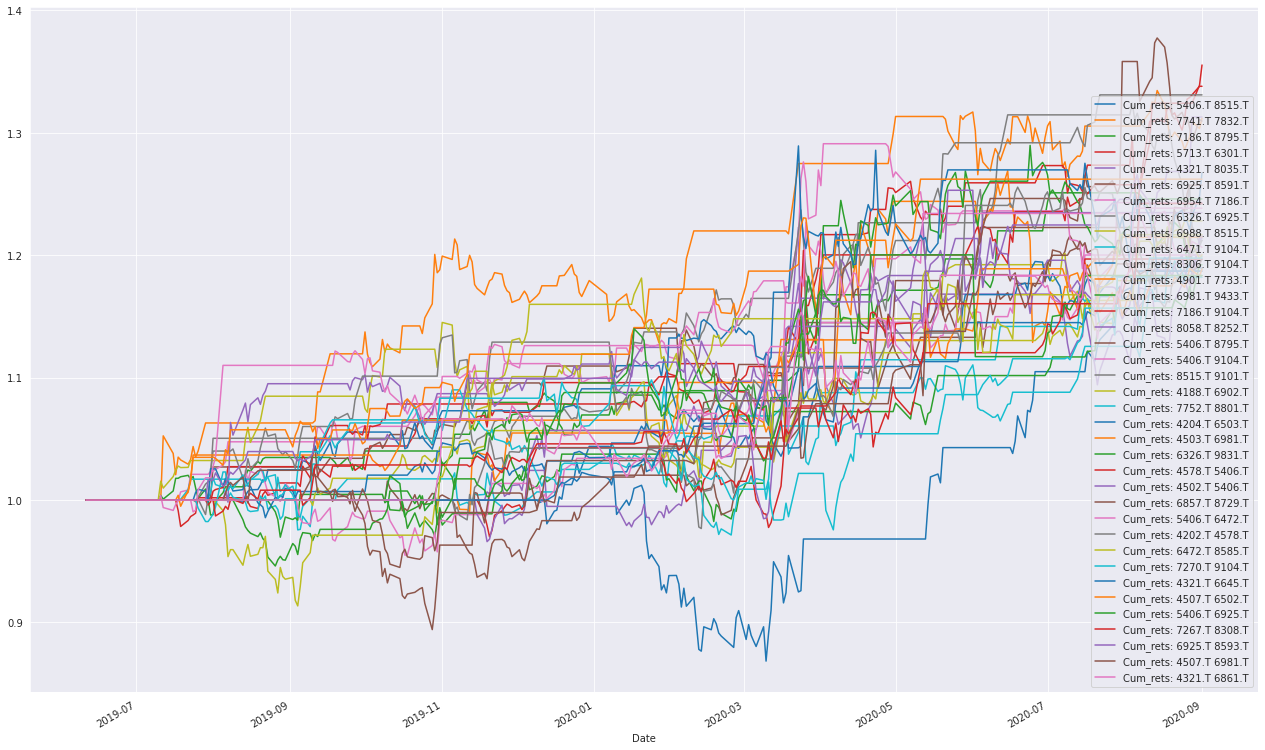

In [20]:
# PERFORMS BACKTEST for the whole portfolio of pairs
threshold1 = 0.15
threshold2 = 1
all_cum_returns = []
print(f'Bactest for period: {df[train_sample:].index[0]} - {df[train_sample:].index[-1]}')
print(f'Net performance statistics (after transaction costs) for total number of pairs: {len(top_coint_pairs_list)}' )

for pair in top_coint_pairs_list:
    cum_returns, CAGR, sharpe, num_days_in_market = backtest(df[train_sample:], pair[0],pair[1], strategy = 1, spread_calculation = 2, entryZscore = 2.0, exitZscore = 0,stoploss_Zscore = 4)
    if CAGR > threshold1:
        if sharpe > threshold2:
            all_cum_returns.append(cum_returns)
            print(f' The pair {pair[0]}-{pair[1]}-> CAGR: {CAGR}, Sharpe: {sharpe}, Number of days in trade: {num_days_in_market}')
    
    #prints equity curve of each pair (for too many pairs the legend does not fit to the image)
            cum_returns.plot(figsize=(22,14),legend=True)
            
                    

Portfolio of pairs performance:
CAGR: 0.1925, Sharpe Ratio: 5.58


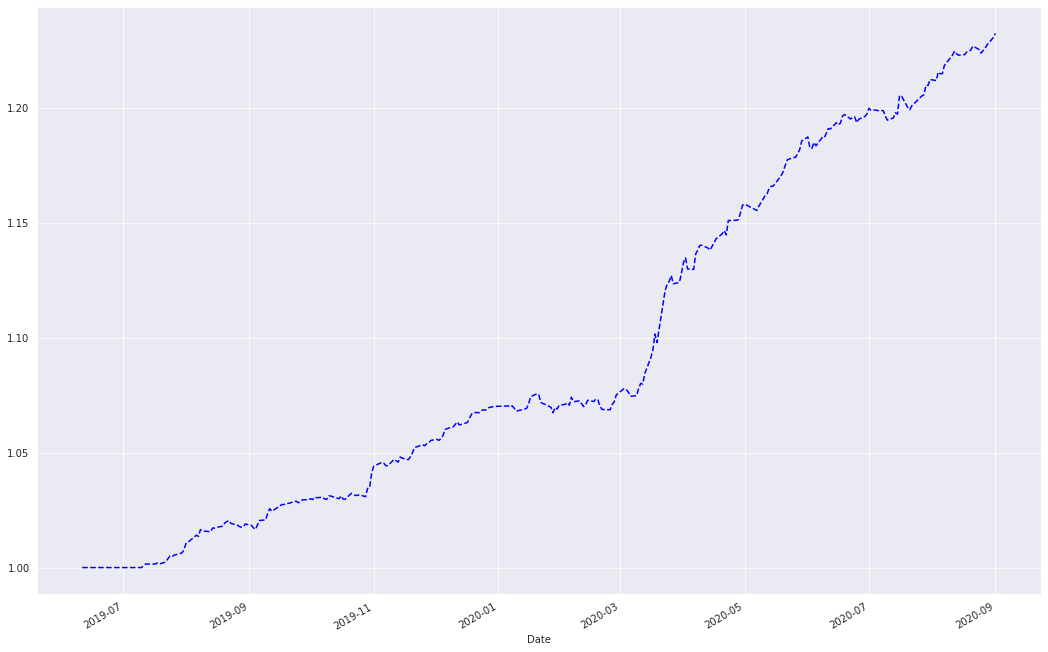

In [21]:
# PLOTS PORTFOLIO EQUITY CURVE
total_returns = 0
for equity_curve in all_cum_returns:
    total_returns += equity_curve 
total_returns = total_returns/len(all_cum_returns)
total_returns.plot(style = 'b--', figsize=(18,12))

total_returns_pct_chg = total_returns.pct_change()
total_returns_pct_chg

try:
    portfolio_sharpe_net = np.sqrt(252) * total_returns_pct_chg.mean() / total_returns_pct_chg.std()
except ZeroDivisionError:
    portfolio_sharpe_net = 0.0

end = total_returns.iloc[-1]
start = total_returns.iloc[0]
days = len(total_returns)
portfolio_cagr_net = ((end / start) ** (252/days))  - 1.0  

print(f'Portfolio of pairs performance:')
print(f'CAGR: {round(portfolio_cagr_net,4)}, Sharpe Ratio: {round(portfolio_sharpe_net,2)}')

                           Strategy
-------------------------  ----------
Start Period               2019-09-02
End Period                 2020-09-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          21.01%
CAGR%                      21.01%
Sharpe                     5.76
Sortino                    15.55
Max Drawdown               -0.76%
Longest DD Days            41
Volatility (ann.)          3.46%
Calmar                     27.47
Skew                       3.39
Kurtosis                   28.45

Expected Daily %           0.08%
Expected Monthly %         1.48%
Expected Yearly %          10.0%
Kelly Criterion            46.11%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.28%
Expected Shortfall (cVaR)  -0.28%

Payoff Ratio               1.71
Profit Factor              3.32
Common Sense Ratio         6.58
CPC Index                  3.75
Tail Ratio                 1.98
Outlier Win Ratio          3.73
Outlier Loss Ratio         3

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-21,2020-01-28,2020-03-02,41,-0.764859,-0.646178
2,2020-07-17,2020-07-21,2020-07-28,11,-0.520524,-0.425646
3,2020-04-03,2020-04-06,2020-04-07,4,-0.443044,-0.424680
4,2020-07-02,2020-07-10,2020-07-16,14,-0.433005,-0.351846
5,2020-06-02,2020-06-03,2020-06-10,8,-0.421916,-0.387609


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


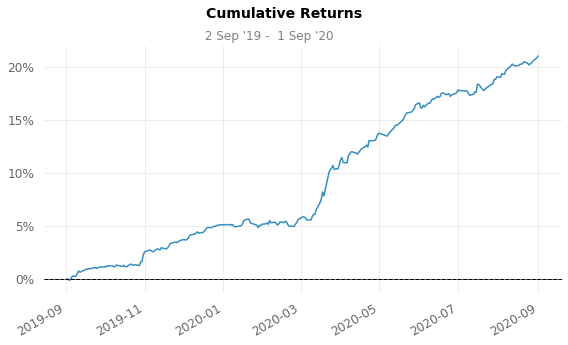

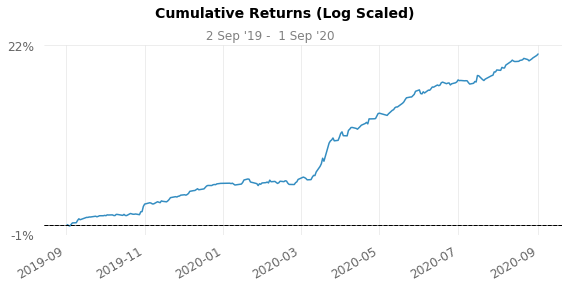

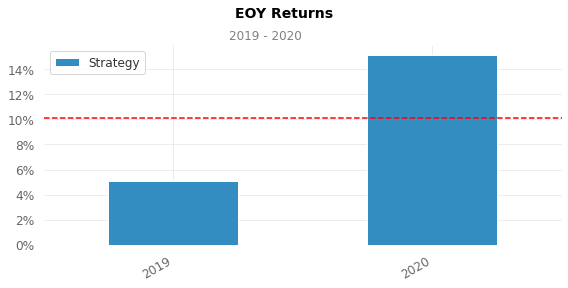

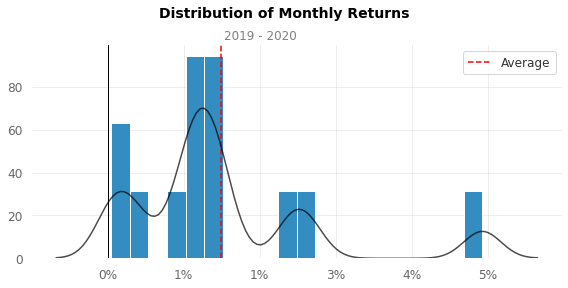

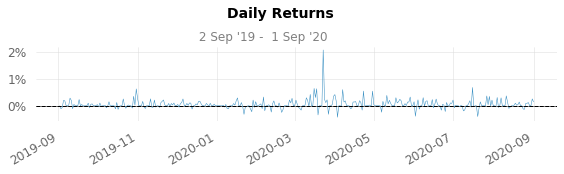

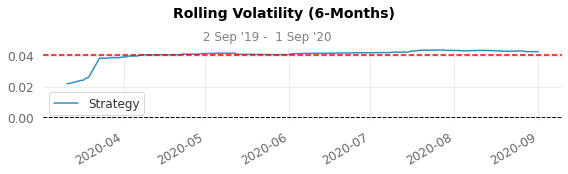

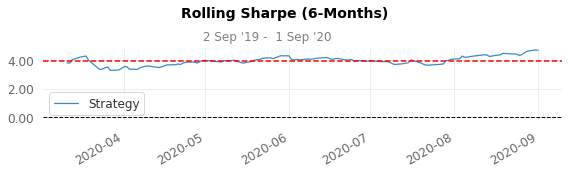

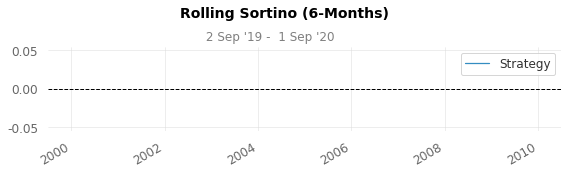

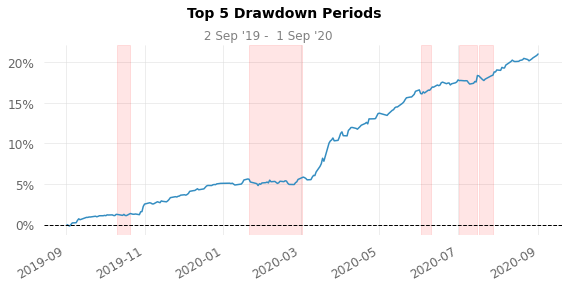

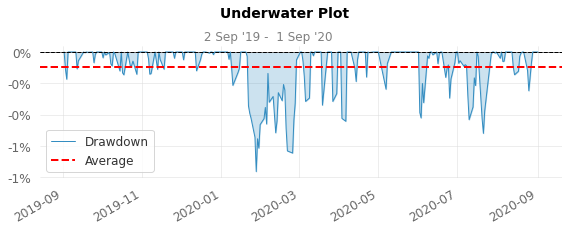

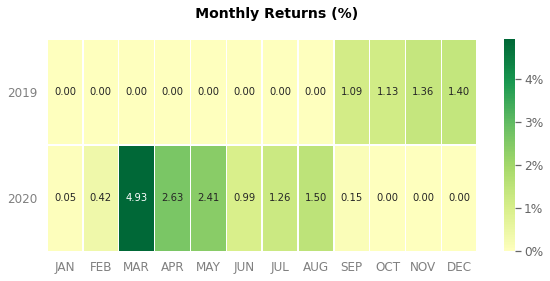

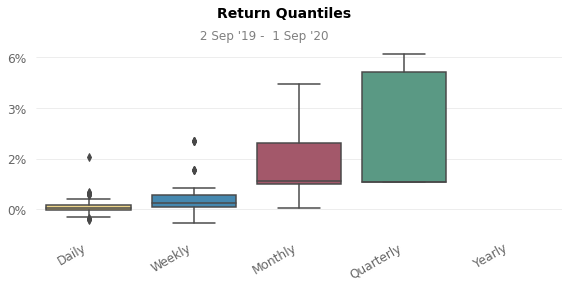

In [22]:
import quantstats as qs
threshold_date = '2019-09-01'
qs.reports.full(total_returns[threshold_date:])

In [23]:
##qs.reports.html(total_returns[threshold_date:],output='available australia tickers in finance portfolio.html')

Bactest for period: 2019-06-11 00:00:00 - 2020-09-01 00:00:00
Net performance statistics (after transaction costs) for total number of pairs: 691
 The pair 5401.T-8334.T-> CAGR: 0.12301640091333699, Sharpe: 1.4389752563624787, Number of days in trade: 33
 The pair 4901.T-7752.T-> CAGR: 0.1515405943091266, Sharpe: 1.6279179050336254, Number of days in trade: 36
 The pair 6981.T-9005.T-> CAGR: 0.11724690663386483, Sharpe: 1.8771538879696525, Number of days in trade: 12
 The pair 4689.T-8233.T-> CAGR: 0.19314621592685643, Sharpe: 1.446058002053866, Number of days in trade: 31
 The pair 5401.T-7182.T-> CAGR: 0.12252175571201906, Sharpe: 1.1853011255535146, Number of days in trade: 70
 The pair 6472.T-8515.T-> CAGR: 0.11820448779441772, Sharpe: 1.86160435001943, Number of days in trade: 17
 The pair 6702.T-8410.T-> CAGR: 0.10816654178324181, Sharpe: 1.409289603096179, Number of days in trade: 45
 The pair 6702.T-9024.T-> CAGR: 0.13858115732050869, Sharpe: 1.5931168810715512, Number of days 

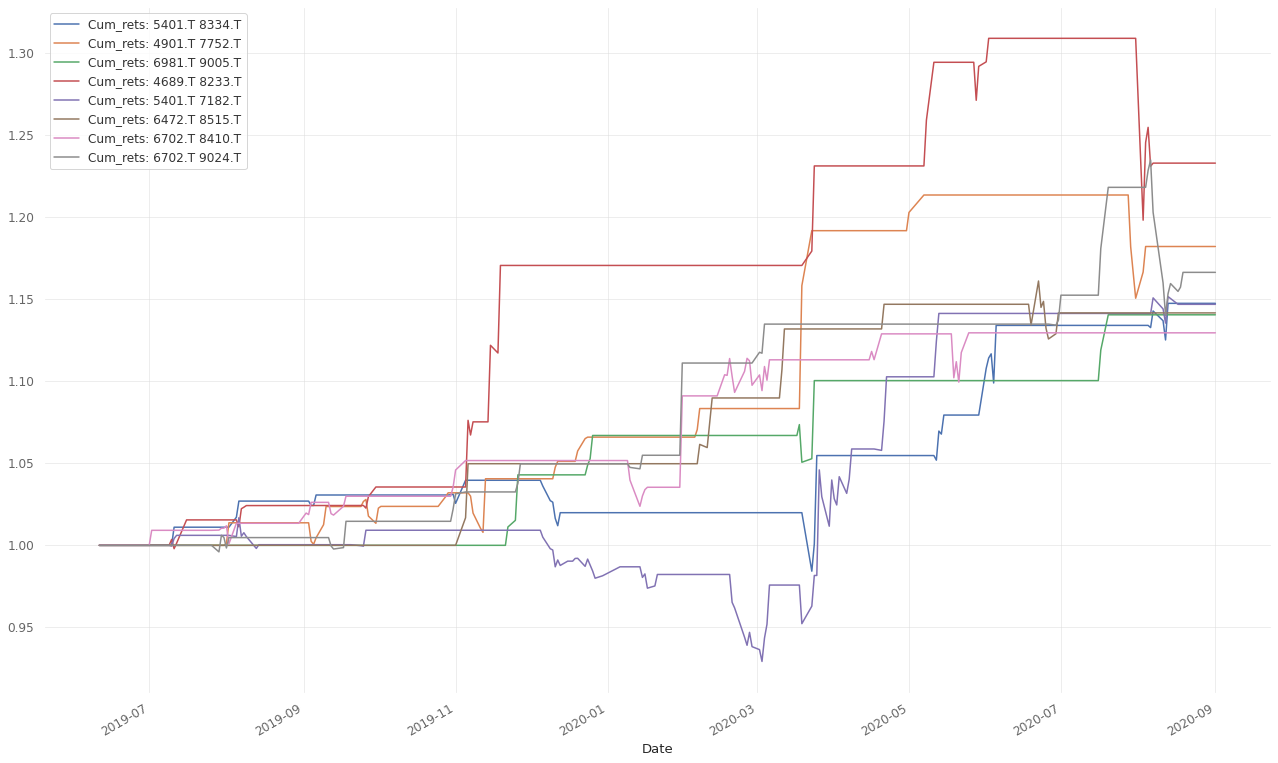

In [26]:
# PERFORMS BACKTEST for the whole portfolio of pairs
threshold1 = 0.10
threshold2 = 0
all_cum_returns = []
print(f'Bactest for period: {df[train_sample:].index[0]} - {df[train_sample:].index[-1]}')
print(f'Net performance statistics (after transaction costs) for total number of pairs: {len(top_coint_pairs_list)}' )

for pair in top_coint_pairs_list:
    cum_returns, CAGR, sharpe, num_days_in_market = backtest(df[train_sample:], pair[0],pair[1], strategy = 1, spread_calculation = 1, entryZscore = 2.0, exitZscore = 0,stoploss_Zscore = 4)
    if CAGR > threshold1:
        if sharpe > threshold2:
            all_cum_returns.append(cum_returns)
            print(f' The pair {pair[0]}-{pair[1]}-> CAGR: {CAGR}, Sharpe: {sharpe}, Number of days in trade: {num_days_in_market}')
    
    #prints equity curve of each pair (for too many pairs the legend does not fit to the image)
            cum_returns.plot(figsize=(22,14),legend=True)

Portfolio of pairs performance:
CAGR: 0.1341, Sharpe Ratio: 3.75


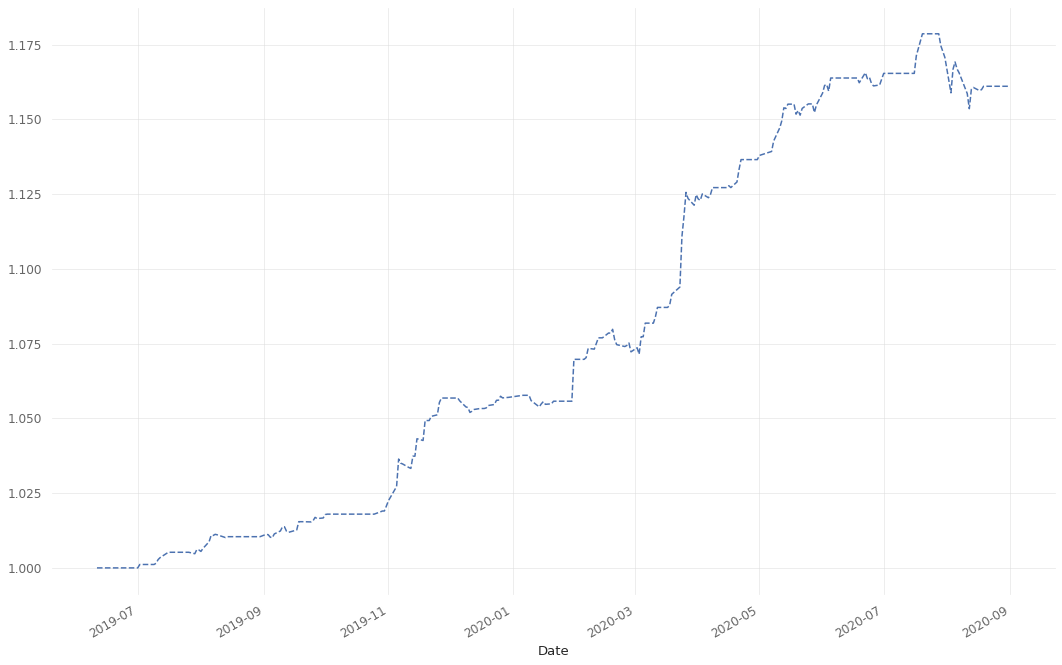

In [27]:
# PLOTS PORTFOLIO EQUITY CURVE
total_returns = 0
for equity_curve in all_cum_returns:
    total_returns += equity_curve 
total_returns = total_returns/len(all_cum_returns)
total_returns.plot(style = 'b--', figsize=(18,12))

total_returns_pct_chg = total_returns.pct_change()
total_returns_pct_chg

try:
    portfolio_sharpe_net = np.sqrt(252) * total_returns_pct_chg.mean() / total_returns_pct_chg.std()
except ZeroDivisionError:
    portfolio_sharpe_net = 0.0

end = total_returns.iloc[-1]
start = total_returns.iloc[0]
days = len(total_returns)
portfolio_cagr_net = ((end / start) ** (252/days))  - 1.0  

print(f'Portfolio of pairs performance:')
print(f'CAGR: {round(portfolio_cagr_net,4)}, Sharpe Ratio: {round(portfolio_sharpe_net,2)}')

In [24]:
#Hedge Ratio window optimisation

all_cagrs_and_sharpes = []
zscore_window = 20
entryZscore = 2.0
exitZscore = 0.5

# calculates portfolio Sharpe Ratio and CAGR  for each Roll_beta_window within the range
for x in range(10, 100, 5):
    all_cum_returns = []
    
    for pair in top_coint_pairs:
        cum_returns, CAGR, sharpe, num_days_in_the_market = backtest(df[train_sample:], pair[0],pair[1], strategy = 1, 
                                                                     roll_beta_window = x, zscore_window = zscore_window,
                                                                    entryZscore = entryZscore, exitZscore = exitZscore)
        all_cum_returns.append(cum_returns)
        
    total_returns = 0
    for equity_curve in all_cum_returns:
        total_returns += equity_curve 
    total_returns = total_returns/len(all_cum_returns)

    total_returns_pct_chg = total_returns.pct_change()

    try:
        portfolio_sharpe_net = np.sqrt(252) * total_returns_pct_chg.mean() / total_returns_pct_chg.std()
    except ZeroDivisionError:
        portfolio_sharpe_net = 0.0

    end = total_returns.iloc[-1]
    start = total_returns.iloc[0]
    days = len(total_returns)
    portfolio_cagr_net = ((end / start) ** (252/days))  - 1.0
    all_cagrs_and_sharpes.append((x, portfolio_cagr_net, portfolio_sharpe_net))
    
# sorts and prints ranked results based on Share Ratio
all_cagrs_and_sharpes = sorted(all_cagrs_and_sharpes, key=lambda x: x[2],reverse = True) 

for c, pair in enumerate(all_cagrs_and_sharpes, 1):
        print(f'{c}: Hedge ratio window: {pair[0]}, zScore window: {zscore_window}, CAGR: {round(pair[1],3)}, Sharpe Ratio: {round(pair[2],2)}')  

NameError: name 'top_coint_pairs' is not defined

In [ ]:
# Z-score_window optimisation

all_cagrs_and_sharpes_zscore_optim = []
total_returns_all = []
roll_beta_window = 15
entryZscore = 2.0
exitZscore = 0.5

# calculates portfolio Sharpe Ratio and CAGR  for each zScore window within the range
for x in range(10, 100, 5):
    all_cum_returns = []
    
    for pair in top_coint_pairs:
        cum_returns, CAGR, sharpe, num_days_in_the_market = backtest(df[train_sample:], pair[0],pair[1], strategy = 1, 
                                                                     roll_beta_window = roll_beta_window, zscore_window = x,
                                                                    entryZscore = entryZscore, exitZscore = exitZscore)
        all_cum_returns.append(cum_returns)

    total_returns = 0
    for equity_curve in all_cum_returns:
        total_returns += equity_curve    
    total_returns = total_returns/len(all_cum_returns)
    total_returns_all.append((x, total_returns))
    total_returns_pct_chg = total_returns.pct_change()

    try:
        portfolio_sharpe_net = np.sqrt(252) * total_returns_pct_chg.mean() / total_returns_pct_chg.std()
    except ZeroDivisionError:
        portfolio_sharpe_net = 0.0

    end = total_returns.iloc[-1]
    start = total_returns.iloc[0]
    days = len(total_returns)
    portfolio_cagr_net = ((end / start) ** (252/days))  - 1.0
    all_cagrs_and_sharpes_zscore_optim.append((x, portfolio_cagr_net, portfolio_sharpe_net))

# sorts and prints ranked results based on Share Ratio
all_cagrs_and_sharpes_zscore_optim = sorted(all_cagrs_and_sharpes_zscore_optim, key=lambda x: x[2],reverse = True) 
for c, pair in enumerate(all_cagrs_and_sharpes_zscore_optim, 1):
        print(f'{c}: Hedge ratio window: {roll_beta_window}, zScore window: {pair[0]}, CAGR: {round(pair[1],3)}, Sharpe Ratio: {round(pair[2],2)}')  